In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

In [11]:
!source $HOME/materiapps/espresso/espressovars.sh

# Определение параметров решетки ecutwfc, ecutrho, K_POINTS

In [4]:
def gen_struct(ecutwfc, k):
    struct = f"""
&control
  calculation = 'scf'
  prefix = 'base'
  pseudo_dir = 'sssp'
  outdir = 'out'
/
&system
  ibrav = 2
  A = 5.58
  nat = 1
  ntyp = 1
  ecutwfc = {ecutwfc}
  ecutrho = {ecutwfc * 8}
  occupations = 'smearing'
  smearing = 'cold'
  degauss = 0.02
/
&electrons
/
ATOMIC_SPECIES
  Ca 40.078 Ca_pbe_v1.uspp.F.UPF
ATOMIC_POSITIONS crystal
  Ca 0.0 0.0 0.0
K_POINTS automatic
  {k} {k} {k} 0 0 0
"""
    with open(f"IN/{ecutwfc}_{k}.txt", "w") as f:
        f.write(struct)

In [5]:
# Generate files
file_names = []
for i in range(30, 100, 10):
    for j in range(1, 11):
        gen_struct(i, j)
        file_names.append(f"IN/{i}_{j}.txt")

In [ ]:
for item in file_names:
    !pw.x -in {item} > RES/{item}

In [7]:
file_names = !ls -v IN/*.txt

In [ ]:
fig = plt.figure()
plt.scatter(ecuts, es)
plt.show()

In [9]:
res = {}
for i in range(1, 11):
    for j in range(30, 100, 10):
            local_result = !cat Res/IN/{j}_{i}.txt
            nrg = float([line for line in local_result if line.startswith('!')][0].split()[4])
            res[(i, j)] = nrg

In [10]:
res

{(1, 30): -75.29173152,
 (1, 40): -75.29178742,
 (1, 50): -75.29189151,
 (1, 60): -75.29191274,
 (1, 70): -75.29194079,
 (1, 80): -75.2919665,
 (1, 90): -75.29197705,
 (2, 30): -74.89752807,
 (2, 40): -74.89760706,
 (2, 50): -74.89771272,
 (2, 60): -74.89774039,
 (2, 70): -74.897774,
 (2, 80): -74.89779748,
 (2, 90): -74.89780642,
 (3, 30): -74.92052516,
 (3, 40): -74.92060389,
 (3, 50): -74.9207071,
 (3, 60): -74.92073793,
 (3, 70): -74.92077083,
 (3, 80): -74.92079673,
 (3, 90): -74.92080569,
 (4, 30): -74.92990713,
 (4, 40): -74.92998921,
 (4, 50): -74.93009117,
 (4, 60): -74.93012212,
 (4, 70): -74.93015384,
 (4, 80): -74.93018011,
 (4, 90): -74.93018846,
 (5, 30): -74.92457698,
 (5, 40): -74.92465747,
 (5, 50): -74.92475883,
 (5, 60): -74.92479012,
 (5, 70): -74.92482216,
 (5, 80): -74.92484811,
 (5, 90): -74.92485669,
 (6, 30): -74.92380652,
 (6, 40): -74.9238876,
 (6, 50): -74.92399034,
 (6, 60): -74.92402111,
 (6, 70): -74.92405377,
 (6, 80): -74.92407942,
 (6, 90): -74.9240881

In [ ]:
# ecutwfc = 40
# ecutrho = 320
# k = 7

# Постоянная решетки

In [12]:
struct = """
&control
  calculation = 'vc-relax'
  prefix = 'base'
  pseudo_dir = 'sssp'
  outdir = 'out'
/
&system
  ibrav = 2
  A = 5.58
  nat = 1
  ntyp = 1
  ecutwfc = 80
  ecutrho = 640
  occupations = 'smearing'
  smearing = 'cold'
  degauss = 0.02
/
&electrons
  conv_thr = 1.d-8
/
&ions
/
&cell
/
ATOMIC_SPECIES
  Ca 40.078 Ca_pbe_v1.uspp.F.UPF
ATOMIC_POSITIONS crystal
  Ca 0.0 0.0 0.0
K_POINTS automatic
  9 9 9 0 0 0
"""
with open(f"relax.txt", "w") as f:
    f.write(struct)

In [13]:
!cat relax.txt


&control
  calculation = 'vc-relax'
  prefix = 'base'
  pseudo_dir = 'sssp'
  outdir = 'out'
/
&system
  ibrav = 2
  A = 5.58
  nat = 1
  ntyp = 1
  ecutwfc = 80
  ecutrho = 640
  occupations = 'smearing'
  smearing = 'cold'
  degauss = 0.02
/
&electrons
  conv_thr = 1.d-8
/
&ions
/
&cell
/
ATOMIC_SPECIES
  Ca 40.078 Ca_pbe_v1.uspp.F.UPF
ATOMIC_POSITIONS crystal
  Ca 0.0 0.0 0.0
K_POINTS automatic
  9 9 9 0 0 0


In [14]:
!pw.x -in relax.txt > relax.out

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG


In [15]:
result_relax = !cat relax.out
energy_lines_relax = [line for line in result_relax if line.startswith('!')]
total_energy_relax = float(energy_lines_relax[-1].split()[4])
last = 0
for q, line in enumerate(result_relax):
    if line.startswith('CELL_PARAMETERS'):
        last = q
mult = float(result_relax[last + 1].split()[2]) * 2

In [16]:
print(mult)
print(mult * 5.58)

0.989890876
5.52359108808


In [17]:
A = mult * 5.58

# Изолированный атом

In [18]:
struct = """
&control
  calculation = 'scf'
  prefix = 'single'
  pseudo_dir = 'sssp'
  outdir = 'out'
/
&system
  ibrav = 1
  A = 17
  nat = 1
  ntyp = 1
  ecutwfc = 80
  ecutrho = 640
  occupations = 'fixed'
  nspin = 2
  tot_magnetization = 0
/
&electrons
/
ATOMIC_SPECIES
  Ca 40.078 Ca_pbe_v1.uspp.F.UPF
ATOMIC_POSITIONS crystal
  Ca 0.0 0.0 0.0
K_POINTS gamma
"""
with open(f"single.txt", "w") as f:
    f.write(struct)

In [19]:
result_single = !pw.x -in single.txt
energy_lines_single = [line for line in result_single if line.startswith('!')]
print(energy_lines_single)
total_energy_single = float(energy_lines_single[0].split()[4])
print(total_energy_single)
print((total_energy_relax - total_energy_single) * 13.6056980659, total_energy_relax, total_energy_single)

['!    total energy              =     -74.78489383 Ry']
-74.78489383
-1.9089984885038827 -74.92520258 -74.78489383


In [19]:
# 1.84

# Уравнение Берча-Мурнагана

In [20]:
import scipy.optimize as opt

In [21]:
def eos(v, a, b, c):
    return a + b * v + c * v**2

In [38]:
def gen_struct(A, b):
    struct = f"""
&control
  calculation = 'scf'
  prefix = 'base'
  pseudo_dir = 'sssp'
  outdir = 'out'
/
&system
  ibrav = 2
  A = {A}
  nat = 1
  ntyp = 1
  ecutwfc = 40
  ecutrho = 320
  occupations = 'smearing'
  smearing = 'cold'
  degauss = 0.02
/
&electrons
  conv_thr = 1.d-8
/
&ions
/
&cell
/
ATOMIC_SPECIES
  Ca 40.078 Ca_pbe_v1.uspp.F.UPF
ATOMIC_POSITIONS crystal
  Ca 0.0 0.0 0.0
K_POINTS automatic
  7 7 7 0 0 0
"""
    with open(f"base_{b}.txt", "w") as f:
        f.write(struct)

In [39]:
percents = []
As = []
for i in np.linspace(0.95, 1.05, 11):
    percents.append(i)
    As.append(A * i)

In [40]:
for i in As:
    ri = round(i, 4)
    print(ri)
    gen_struct(ri, ri)

5.2462
5.3015
5.3567
5.4119
5.4671
5.5224
5.5776
5.6328
5.688
5.7433
5.7985


In [41]:
volumes = []

In [42]:
energies = []

In [43]:
for i in As:
    ri = round(i, 4)
    local_result = !pw.x -in base_{ri}.txt
    nrg = float([line for line in local_result if line.startswith('!')][0].split()[4])
    energies.append(nrg * 13.6056980659)
    volumes.append(ri * ri * ri / 4)

In [44]:
def Birch_Murnaghan(V, E_0, V_0, B_0, B_1):
    return E_0 + 9 * V_0 * B_0 / 16 * (((np.abs(V_0 / V)) ** (2 / 3) - 1) ** 3 * B_1 + ((np.abs(V_0 / V)) ** (2 / 3) - 1) ** 2 * (6 - 4 * ((np.abs(V_0 / V)) ** (2 / 3))))

In [45]:
volumes

[36.097284968782,
 37.25086019459375,
 38.42660200881575,
 39.62682694178975,
 40.85178728842776,
 42.104022569856006,
 43.37925658214401,
 44.67998334988799,
 46.006455167999995,
 47.361398200434245,
 48.74016478665625]

In [46]:
energies

[-1019.3561032303185,
 -1019.378011397458,
 -1019.394458781622,
 -1019.405826750527,
 -1019.4124490519465,
 -1019.4146371203096,
 -1019.4126949069107,
 -1019.4069158866572,
 -1019.3975781600177,
 -1019.3849105748333,
 -1019.369211231949]

In [47]:
fit, cov = opt.curve_fit(Birch_Murnaghan, volumes, energies, bounds=([-1020, 36, -np.inf, -np.inf],[-1019, 49, np.inf, np.inf]))

In [55]:
print(f"E0:\t%.4f" % fit[0])
print(f"V0:\t%.4f" % fit[1])
print(f"B0:\t%.4f" % (fit[2] * 160.2))
print(f"B:\t%.4f" % (fit[3] * 160.2))

E0:	-1019.4146
V0:	42.1265
B0:	17.3984
B:	542.5846


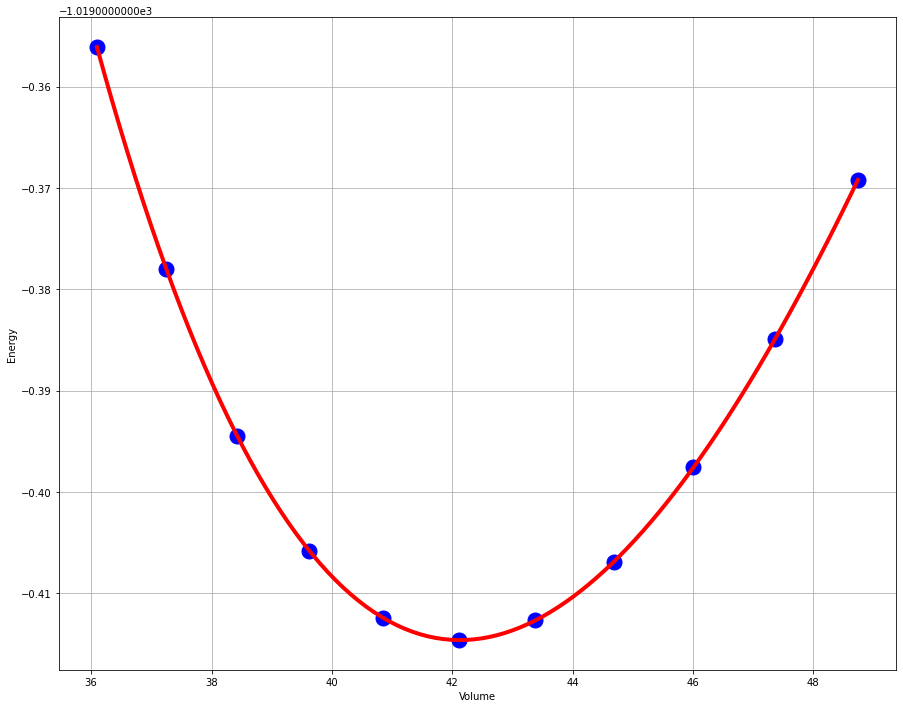

In [34]:
plt.plot(volumes, energies, 'bo', markersize = 15)
xsBM = np.linspace(volumes[0], volumes[-1], 100)
plt.plot(xsBM, Birch_Murnaghan(xsBM, *fit), 'r',linewidth = 4)
plt.xlabel('Volume')
plt.ylabel('Energy')
plt.grid()
plt.show()